<div class="alert block alert-info alert">

# <center> Scientific Programming in Python

## <center>Karl N. Kirschner<br>Bonn-Rhein-Sieg University of Applied Sciences<br>Sankt Augustin, Germany

# <center> SciPy

<center> "SciPy is a collection of <b>mathematical algorithms</b> and <b>convenience functions</b> built on the NumPy extension of Python." [1]</center>
<br>

**Source**: https://scipy.org/
<br><br>

Heavily depends on the following libraries:
1. Numpy
<br>

### Subpackages

"SciPy is organized into subpackages covering different scientific computing domains." [1]
   
1. cluster: Clustering algorithms
2. constants: Physical and mathematical constants
3. fftpack: Fast Fourier Transform routines
4. **integrate**: Integration and ordinary differential equation solvers
5. **interpolate**: Interpolation and smoothing splines
6. io: Input and Output
7. linalg: Linear algebra
8. ndimage: N-dimensional image processing
9. odr: Orthogonal distance regression
10. **optimize**: Optimization and root-finding routines
11. signal: Signal processing
12. sparse: Sparse matrices and associated routines
13. spatial: Spatial data structures and algorithms
14. special: Special functions
15. stats: Statistical distributions and functions

<h2><center>One of the strengths of SciPy is that it can provide <b>numerical solutions</b><br>(i.e.. approximated).</center></h2>
    
<h2><center>The opposite of numerical solutions are <banalytic solutions</b><br>(i.e., exact; `f(2) = x^2 = 4`).</center></h2>

### For citing SciPy:

Pauli Virtanen, Ralf Gommers, Travis E. Oliphant, Matt Haberland, Tyler Reddy, David Cournapeau, Evgeni Burovski, Pearu Peterson, Warren Weckesser, Jonathan Bright, Stéfan J. van der Walt, Matthew Brett, Joshua Wilson, K. Jarrod Millman, Nikolay Mayorov, Andrew R. J. Nelson, Eric Jones, Robert Kern, Eric Larson, CJ Carey, İlhan Polat, Yu Feng, Eric W. Moore, Jake VanderPlas, Denis Laxalde, Josef Perktold, Robert Cimrman, Ian Henriksen, E.A. Quintero, Charles R Harris, Anne M. Archibald, Antônio H. Ribeiro, Fabian Pedregosa, Paul van Mulbregt, and SciPy 1.0 Contributors. (2020) SciPy 1.0: Fundamental Algorithms for Scientific Computing in Python. Nature Methods, 17(3), 261-272.

<br>

**Bibtex file**:

@ARTICLE{2020SciPy-NMeth,

  author  = {Virtanen, Pauli and Gommers, Ralf and Oliphant, Travis E. and Haberland, Matt and Reddy, Tyler and Cournapeau, David and Burovski, Evgeni and Peterson, Pearu and Weckesser, Warren and Bright, Jonathan and {van der Walt}, St{\'e}fan J. and Brett, Matthew and Wilson, Joshua and Millman, K. Jarrod and Mayorov, Nikolay and Nelson, Andrew R. J. and Jones, Eric and Kern, Robert and Larson, Eric and Carey, C J and Polat, {\.I}lhan and Feng, Yu and Moore, Eric W. and {VanderPlas}, Jake and Laxalde, Denis and Perktold, Josef and Cimrman, Robert and Henriksen, Ian and Quintero, E. A. and Harris, Charles R. and Archibald, Anne M. and Ribeiro, Ant{\^o}nio H. and Pedregosa, Fabian and {van Mulbregt}, Paul and {SciPy 1.0 Contributors}},

  title   = {{{SciPy} 1.0: Fundamental Algorithms for Scientific Computing in Python}},

  journal = {Nature Methods},

  year    = {2020},

  volume  = {17},

  pages   = {261--272},

  adsurl  = {https://rdcu.be/b08Wh},

  doi     = {10.1038/s41592-019-0686-2},

}

### Helpful documents

- Manual: https://docs.scipy.org/doc/

- API: https://docs.scipy.org/doc/scipy/reference/

- Tutorials: https://docs.scipy.org/doc/scipy/tutorial/index.html
    

<hr style="border:2px solid gray"></hr>
    
**Note**: All user-defined functions shown within the notebook do not include document strings (i.e. block comments) or internal checks. This is purposely done for focusing on the teaching aspects of the lecture. **A full and proper user-defined function would include these.**

#### References
1. ScyPy Website, "Introduction", https://docs.scipy.org/doc/scipy/tutorial/general.html. Visited on June 19th, 2022.

In [ ]:
#help(scipy)

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import scipy

from scipy.integrate import quad

print('Versions Used')
print(f'matplotlib: {matplotlib.__version__}')
print(f'NumPy: {np.__version__}')
print(f'SciPy: {scipy.__version__}')

Versions Used
matplotlib: 3.9.2
NumPy: 1.26.4
SciPy: 1.12.0


In [2]:
## For extra information given within the lectures

from IPython.display import HTML


def set_code_background(color: str):
    ''' Set the background color for code cells.

        Source: psychemedia via https://stackoverflow.com/questions/49429585/
                how-to-change-the-background-color-of-a-single-cell-in-a-jupyter-notebook-jupy

        To match Jupyter's dev class colors:
            "alert alert-block alert-warning" = #fcf8e3

        Args:
            color: HTML color, rgba, hex
    '''

    script = ("var cell = this.closest('.code_cell');"
              "var editor = cell.querySelector('.input_area');"
              f"editor.style.background='{color}';"
              "this.parentNode.removeChild(this)")
    display(HTML(f'<img src onerror="{script}">'))


set_code_background(color='#fcf8e3')

## Integration

Let's start with integration. (Note: **SymPy** is another library that allows us to integrate.)

**What can integration do for us?** For something that is defined by a mathematical function (i.e., an equation), we can obtain the following information:

1. **areas** (i.e., 2D; e.g., the area between two curves that cross each other),
2. **volumes** (i.e., 3D; e.g., swimming pool design),
3. **surface area** (e.g., of a protein),
3. **displacements** (e.g., distance with respect to time),
4. **center** (e.g., of mass), and
5. **probability**.

- integrate https://docs.scipy.org/doc/scipy/tutorial/integrate.html


Graphically, when we <font color='DodgerBlue'>integrate a function f(x)</font> we obtain the <font color='DodgerBlue'>"area under the curve"</font>.

<center><img src="00_images/integral_example.png" alt="integral" style="width: 200px;"/></center>

<center><b>Figure 1</b>: Depiction that shows the "area under the curve" determined through integration of function <font color='DodgerBlue'>"f(x)" with limits from "a" to "b"</font>.</center>

<br>

It is kinda like doing addition, but for something that is continuous (i.e., not finite).

Image Source: https://en.wikipedia.org/wiki/Integral#/media/File:Integral_example.svg

Let's define a simple function:

$$f(x) = \int_0^1 (mx^2 + n) dx$$

I'm going to stick with variable names that match the equation given above for consistency. We will focus on the equation within the integration.

Variables (https://en.wikipedia.org/wiki/Dependent_and_independent_variables)
- <font color='DodgerBlue'>Indpendent</font> variables: **x** (plotted on the x-axis)
- <font color='DodgerBlue'>Dependent</font> variable: **f(x)** --> y (plotted on the y-axis)

Disclaimer: for teaching purposes, the docstring, context, and internal checks are purposely left out in the following function.

In [3]:
def simple_function(x: float, m: float, n: float) -> float:
    return m*x**2 + n

#### Generate the starting data

Define the two variables `m` and `n`:

In [4]:
m = 3.00
n = 5.00

Generate some data along the x-axis:

In [5]:
x_data = np.linspace(-1, 2, 20)
x_data

array([-1.        , -0.84210526, -0.68421053, -0.52631579, -0.36842105,
       -0.21052632, -0.05263158,  0.10526316,  0.26315789,  0.42105263,
        0.57894737,  0.73684211,  0.89473684,  1.05263158,  1.21052632,
        1.36842105,  1.52631579,  1.68421053,  1.84210526,  2.        ])

<div class="alert alert-block alert-warning">
<hr style="border:1.5px dashed gray"></hr>

**Sidenote**: Numpy's linspace vs arrange:

- linspace (i.e. `numpy.linspace(start, stop, num`): "Return evenly spaced numbers over a specified interval."
    - https://numpy.org/devdocs/reference/generated/numpy.linspace.html
    - the stepsize is created
    - the number of steps must be given

Versus
- arange (i.e. `numpy.arange(start, stop, step)`: "Return evenly spaced values within a given interval."
    - https://numpy.org/doc/stable/reference/generated/numpy.arange.html
    - the stepsize is specified
    - the number of steps is created

<hr style="border:1.5px dashed gray"></hr>

The **y-data** can be generated using the equation we encoded in the above function:

In [6]:
y_data = simple_function(x_data, m, n)
y_data

array([ 8.        ,  7.12742382,  6.40443213,  5.83102493,  5.40720222,
        5.13296399,  5.00831025,  5.033241  ,  5.20775623,  5.53185596,
        6.00554017,  6.62880886,  7.40166205,  8.32409972,  9.39612188,
       10.61772853, 11.98891967, 13.50969529, 15.1800554 , 17.        ])

#### Visualize the Data

We can plot the curve:
- x range = -1 to 2, and then
- visualize the area between the integration limits (i.e. from 0 to 1).

**Notice**: for the y-values we use the user-defined function directly in the `plt.plot` function call.

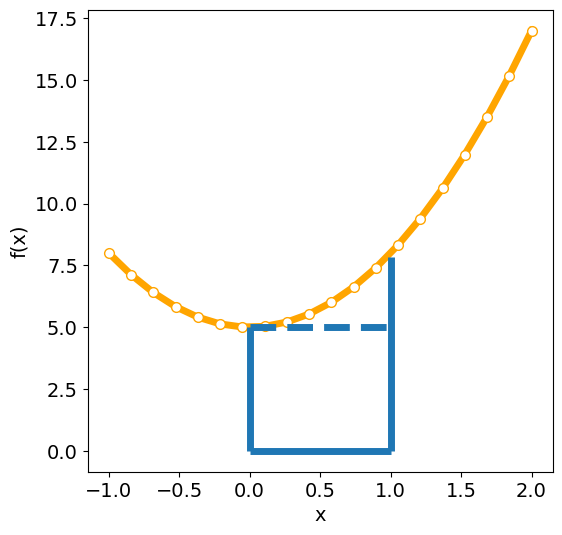

In [7]:
plt.figure(figsize=(6, 6))

plt.plot(x_data, y_data, color='orange', linewidth=5,
         marker='o', markersize=7, mfc='white')

plt.hlines(y=0.0, xmin=0.0, xmax=1.0, linewidth=5)
plt.hlines(y=5.0, xmin=0.0, xmax=1.0, linewidth=5, linestyle='dashed')

plt.vlines(x=0.0, ymin=0.0, ymax=5.0, linewidth=5)
plt.vlines(x=1.0, ymin=0.0, ymax=7.85, linewidth=5)

plt.xlabel(xlabel='x', fontsize=14)
plt.ylabel(ylabel='f(x)', fontsize=14)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)

plt.show()

#### Let's "ball-park" (i.e., approximate) the data to enable us to gauge the final integration answer
- approximate the answer: will the **result** that we compute **make sense**?

We can <font color='DodgerBlue'>approximate</font> the area under the orange curve and within the blue region to be:

<font color='DodgerBlue'>rectangle + ca. triangle</font>

`approx. area = 1.0*5.0 + [(1.0*2.5)/2]`

`approx. area = 5.0 + 1.25`

`approx. area = 6.25`

### Integrate using `quad`

Okay, good. Now let's integrate that function.

`quad`: general purpose single integration of a function containing
- one variable (e.g., `x`), and
- evaluated between two points (e.g., `0` to `1`)


- https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.quad.html#scipy.integrate.quad
<br><br>

`scipy.integrate.quad(func, a, b, args=(), full_output=0, epsabs=1.49e-08, epsrel=1.49e-08, limit=50, points=None, weight=None, wvar=None, wopts=None, maxp1=50, limlst=50)`:
    
**Input (required)**
- `func` = the **simple_function** defined above (i.e., a <font color='DodgerBlue'>"callable"</font> Python object)
- `a` (lower integration limit) = **0**
- `b` (upper integration limit) = **1**

**Input (also usually required)**
- `args` (additional arguments to pass) = **(3, 5)** (i.e., the <font color='DodgerBlue'>variables</font> <b>"m"</b> and <b>"n"</b> to the simple_function)

**Output**
- The returned value is a tuple:
    - 1$^{st}$: the resulting **value of the integral**, and
    - 2$^{nd}$: an **upper bound on the error** (this occurs since we are using approximations to solve integrals)

In [8]:
result = quad(func=simple_function, a=0, b=1, args=(m, n))
result

(6.0, 6.661338147750939e-14)

###### Accessing value and error (plus, remembering string formatting):

- f: Fixed-point notation. Displays the number as a fixed-point number. The default precision is 6.
- e: Exponent notation. Prints the number in scientific notation using the letter ‘e’ to indicate the exponent. The default precision is 6.

In [9]:
print(f'Full answer: {result[0]:0.2f} with a maximum error {result[1]:0.2e}.')

Full answer: 6.00 with a maximum error 6.66e-14.


<hr style="border:1px solid gray"></hr>

## A more complicated example

1. Handling infinity limits (i.e., **indefinite integrals**)
2. Python's built-in function **`eval` (evaluate)**
	- https://docs.python.org/3/library/functions.html#eval

Let's first look at each piece, and then we will put it together. To do this stepwise, we will use the `eval` function.

**`eval`** works on single functions (note the use of **quotation marks**):


In [10]:
number = 2

eval('number**2')

4

The `eval` function also works on `np.arrays`.

Example function will be the following:

$$\frac{1}{x^2}$$

First create some x-data:

In [11]:
x_data_array = np.linspace(1, 11, 30)
x_data_array

array([ 1.        ,  1.34482759,  1.68965517,  2.03448276,  2.37931034,
        2.72413793,  3.06896552,  3.4137931 ,  3.75862069,  4.10344828,
        4.44827586,  4.79310345,  5.13793103,  5.48275862,  5.82758621,
        6.17241379,  6.51724138,  6.86206897,  7.20689655,  7.55172414,
        7.89655172,  8.24137931,  8.5862069 ,  8.93103448,  9.27586207,
        9.62068966,  9.96551724, 10.31034483, 10.65517241, 11.        ])

Now evaluate the function at those points (i.e. determine the y-values):

In [12]:
y_data_array = eval('1/(x_data_array**2)')
y_data_array

array([1.        , 0.55292571, 0.35027072, 0.24159724, 0.17664356,
       0.13475405, 0.10617346, 0.08580757, 0.07078529, 0.05938846,
       0.05053783, 0.04352777, 0.03788118, 0.03326609, 0.02944575,
       0.02624762, 0.02354357, 0.02123684, 0.01925322, 0.01753508,
       0.01603707, 0.01472313, 0.0135643 , 0.01253708, 0.01162228,
       0.01080407, 0.01006932, 0.00940705, 0.00880804, 0.00826446])

Let's plot this to visualize the data:

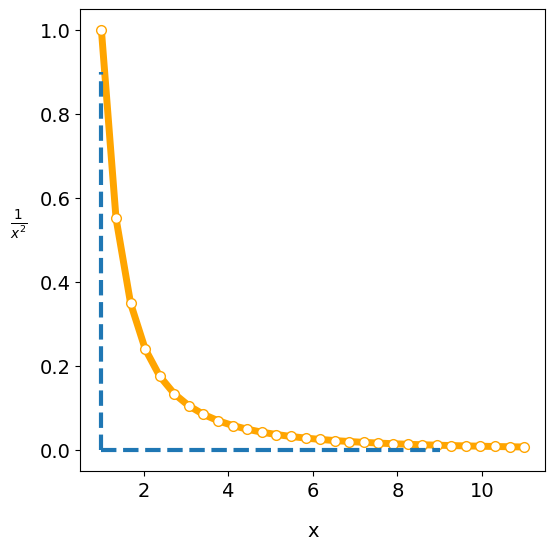

In [13]:
plt.figure(figsize=(6, 6))

plt.plot(x_data_array, y_data_array, color='orange', linewidth=5,
         marker='o', markersize=7, mfc='white')

plt.hlines(y=0.0, xmin=1.0, xmax=9.0, linestyle='dashed', linewidth=3)
plt.vlines(x=1.0, ymin=0.0, ymax=0.9, linestyle='dashed', linewidth=3)

plt.xlabel(xlabel='x', fontsize=14, labelpad=15)
plt.ylabel(ylabel=r'$\frac{1}{x^2}$', fontsize=14, rotation=0, labelpad=15)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)

plt.show()

Imagine this plot going to **infinity** on the **x-axis**.

<font color='DodgerBlue'>What is the area from x=1 to x=infinity?</font>

Hard to say right?

---

Okay, let's create a callable function that we will pass to SciPy's `quad` function for integration:

In [14]:
def function(x: float) -> float:
    return 1/x**2

Let's focus now upon an "improper" integral (i.e. the upper integration limit is infinity).

$$\int_1^{\infty} \frac{1}{x^2} dx$$

In [15]:
result = quad(func=function, a=1, b=np.inf)
result

(1.0, 1.1102230246251565e-14)

<font color='DodgerBlue'>Therefore, the area under the $\frac{1}{x^2}$ curve from x=1 to infinity is 1.0.</font>

(What is the area under the curve from x=2 to infinity?)

**Note**: if we try to do this **all-in-one step** where we provide the function directly, we get an **error**. That is the practical reason why one must create a function for `quad` to call.



In [16]:
result = quad(1/x**2, 1, np.inf)

NameError: name 'x' is not defined

<hr style="border:2px solid gray"></hr>

## Optimization

Finding a numerical solution for maximizing or minimizing a function.

In other words, if we start with an arbitrary point on a function's curve (or surface), an optimization algorithm will locate (i.e. optimize) the lowest energy value with respect to that starting position (see Figure 2).

<img src="00_images/Gradient_descent.gif" alt="gradient_opt" style="width: 400px;"/>

<center>Figure 2: Three starting points on a mathematically defined surface that are optimized to two local minima.<br>(Image source: 
<a href="https://commons.wikimedia.org/wiki/File:Gradient_descent.gif">https://commons.wikimedia.org/wiki/File:Gradient_descent.gif</a>)
</center>


- optimize: https://docs.scipy.org/doc/scipy/reference/optimize.html

### scipy.optimize.minimize() and its output **type**

`scipy.optimize.minimize(fun, x0, args=(), method=None, jac=None, hess=None, hessp=None, bounds=None, constraints=(), tol=None, callback=None, options=None)`

- https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html#scipy.optimize.minimize

**Input (required)**

- `func`: a function that will be minimized

- `x0`: an initial guess

**Methods (i.e., solvers)**
- Nelder-Mead
- Powell
- CG
- **BFGS**
- Newton-CG
- L-BFGS-B
- TNC
- COBYLA
- SLSQP
- trust-constr
- dogleg
- trust-ncg
- trust-exact
- trust-krylov


- **Default solver**: quasi-Newton method of Broyden, Fletcher, Goldfarb, and Shanno (**BFGS**)
    - https://docs.scipy.org/doc/scipy/reference/optimize.minimize-bfgs.html#optimize-minimize-bfgs

**Output**
The output is a <font color='DodgerBlue'>compound object</font> containing a lot of information regarding the convergence (see example below for what it looks like).


- More background on minimization: http://scipy-lectures.org/advanced/mathematical_optimization

<hr style="border:1px solid gray"></hr>

### Example

Find the minimum of the follwoing 1D function (i.e., a scalar function - a function that return a single value from input values):

$$ y = x^2 + 25sin(x) $$

In [17]:
from scipy import optimize

In [18]:
def scalar_func(x: float) -> float:
    return x**2 + 25*np.sin(x)

In [19]:
x_values = np.arange(-10.0, 10.0, 1.0)

y_values = scalar_func(x_values)

**Visualize** what the x- and y-data look like to better understand the data:

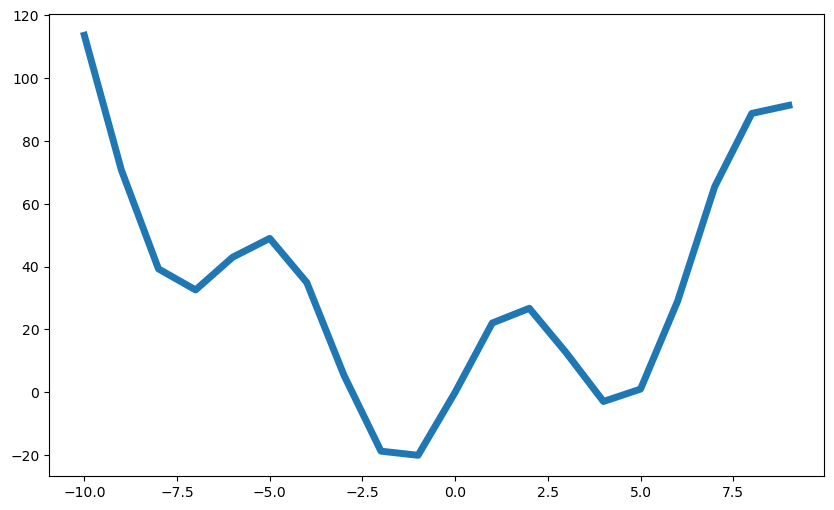

In [20]:
plt.figure(figsize=(10, 6))

plt.plot(x_values, scalar_func(x_values), linewidth=5)

plt.show()

Notice the **three significant minima** that are present (i.e. one **global**, and two **local**)

Let's find out what the **lowest minima might** be within the **input data**
- by visual inspection after zipping
- using `min` built-in function with a lambda
    - `min(iterable, *, key=None)`

In [21]:
for x, y in zip(x_values, y_values):
    print(x, y)

-10.0 113.60052777223424
-9.0 70.69703786895609
-8.0 39.266043834415456
-7.0 32.575335032030274
-6.0 42.98538745497315
-5.0 48.97310686657846
-4.0 34.920062382698205
-3.0 5.47199979850332
-2.0 -18.732435670642044
-1.0 -20.036774620197413
0.0 0.0
1.0 22.036774620197413
2.0 26.732435670642044
3.0 12.528000201496681
4.0 -2.9200623826982053
5.0 1.026893133421538
6.0 29.014612545026853
7.0 65.42466496796973
8.0 88.73395616558454
9.0 91.30296213104391


In [22]:
raw_minimum = min(zip(x_values, y_values), key=lambda value: value[1])

print(f'\nInput Data Minimum: {raw_minimum}')


Input Data Minimum: (-1.0, -20.036774620197413)


Thus, through a simple iteration of the input data, the predicted global minimum would be

<b><font color='DodgerBlue'>x = -1.0 and y = -20.0</color></b>.

But, this is **not accurate enough** - <font color='DodgerBlue'>need to use an optimization method</font>.

<br><br>

### Local optimizers

Use **`optimize.minimier`** to find a minimum using the default **BFGS** method.

- https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html#scipy.optimize.minimize

`scipy.optimize.minimize(fun, x0, args=(), method=None)`

Let's start with an **inital guess** near the global minimum (i.e., `x0 = 0.0`):

In [23]:
result_global = optimize.minimize(fun=scalar_func, x0=0.0, method="BFGS")
type(result_global)

scipy.optimize._optimize.OptimizeResult

In [24]:
result_global

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: -22.71556099678873
        x: [-1.454e+00]
      nit: 5
      jac: [ 2.384e-07]
 hess_inv: [[ 3.727e-02]]
     nfev: 14
     njev: 7

Understanding the results:
- **y-value** is given by `fun: -22.71556099678873`
- **x-value** is given by `x: [-1.454e+00]`

You can retrieve each of these items, as demonstrated by the following:

Position of the found **minimum** on the **x-axis**:

In [25]:
result_global.x

array([-1.45419657])

Value of the found **minimum** on the **y-axis**:

In [26]:
result_global.fun

-22.71556099678873

<br><br>
Now let's set an **initial guess** closer to one of the **local minimum** (i.e., `x0 = 3.0`)

In [27]:
result_local = optimize.minimize(fun=scalar_func, x0=3.0, method="BFGS")
result_local

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: -4.454335797238617
        x: [ 4.356e+00]
      nit: 5
      jac: [-2.384e-07]
 hess_inv: [[ 3.932e-02]]
     nfev: 14
     njev: 7

**Notice**: BFGS finds a local minimum at `x = 4.36` (i.e., **NOT** the global minimum), with `y = -4.45`.

Thus, <font color='DodgerBlue'>BFGS is a local optimizer</font>.

<br><br>

<hr style="border:1px solid gray"></hr>

### Overcoming the dependency on the initial guess (the idea of a <font color='DodgerBlue'>global optimizer</font>)

- `fminbound`: a minimization within boundaries
- `brute`: minimize a function over a given range through lots of sampling
- `differential_evolution`: global minimum a multivariate function
- `shgo`: global minimum using SHG optimization
- `dual_annealing`: global minimum using dual annealing


Let's try these out:
1. `fminbound`
2. `brute`
3. `basinhopping`

<br>

#### 1. **fminbound**
- https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.fminbound.html

`scipy.optimize.fminbound(func, x1, x2, ...)`

- **no starting guess** is used as input

As a reminder of what the data looks like:

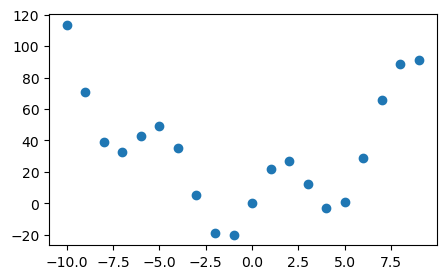

In [28]:
plt.figure(figsize=(5, 3))
plt.plot(x_values, y_values, 'o')
plt.show()

In [29]:
optimize.fminbound(func=scalar_func, x1=-10, x2=10)

-1.4541952455722909

Therefore, <font color='DodgerBlue'>`fminbound` finds the global minimum</font>.

<br>

#### 2. **brute**
- https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.brute.html#scipy.optimize.brute

`scipy.optimize.brute(func, ranges,...)`
- **ranges (tuple)**: "Each component of the ranges **tuple** must be either a **“slice object”** or a **range tuple of the form (low, high)**. The program uses these to create the grid of points on which the objective function will be computed."

Built-in function: `slice(start, stop[, step])`
- https://docs.python.org/3/library/functions.html#slice

**NOTE**: Since we have only <font color='DodgerBlue'>one variable (i.e., `x`)</font>, we only need to <font color='DodgerBlue'>"fill-in" the first part of the tuple</font> (e.g., `(slice(-10, 10, 1), )`)

(The alternativey tuple (low, high) designation would be `(-10, 10), )`.)

In [30]:
my_range = (slice(-10, 10, 0.1), )
optimize.brute(func=scalar_func, ranges=my_range)

array([-1.45422363])

In [31]:
optimize.brute(func=scalar_func, ranges=((-10, 10), ))

array([-1.45420436])

Therefore, <font color='DodgerBlue'>`brute` also finds the global minimum</font> at `x = -1.45`.

<br>

#### 3. **basin hopping**
- https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.basinhopping.html

`scipy.optimize.basinhopping(func, x0, niter=100, T=1.0, stepsize=0.5, ...)`

- combines global stepping with local minimization
- rugged, funnel-like surfaces (e.g., molecular potential energy surfaces)
- requires: a function and an initial guess (so not a "perfect" method)
    
- sensitive to stepsize
    - `stepsize=0.5` (i.e., default value) will find in a local minmium
    - `stepsize=2.5` will find the global mimimum

Recall that `x0 = 3.0` gave a **local minimum** at `x = 4.45` when using a local minimizer (i.e., `optimize.minimize(fun=scalar_func, x0=3.0, method="BFGS")`).

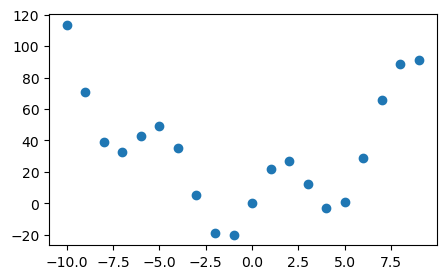

In [32]:
plt.figure(figsize=(5, 3))
plt.plot(x_values, y_values, 'o')
plt.show()

In [33]:
optimize.basinhopping(func=scalar_func, x0=3.0, stepsize=0.5)

                    message: ['requested number of basinhopping iterations completed successfully']
                    success: True
                        fun: -4.454335797238624
                          x: [ 4.356e+00]
                        nit: 100
      minimization_failures: 0
                       nfev: 1094
                       njev: 547
 lowest_optimization_result:  message: Optimization terminated successfully.
                              success: True
                               status: 0
                                  fun: -4.454335797238624
                                    x: [ 4.356e+00]
                                  nit: 4
                                  jac: [ 4.768e-07]
                             hess_inv: [[ 3.931e-02]]
                                 nfev: 12
                                 njev: 6

Basin hopping returns a value of <font color='red'>**x = 4.36; y = -4.45**</font> when using a **small stepsize**
 - it <font color='red'>did not</font> find the **global minimum**

local minimum (approx.):  `x = 4.4; y = -4.5`

global minimum (approx.): `x = -1.4; y = -22.7`

<br>

Let's make the <font color='DodgerBlue'>**stepsize** larger</font>:

In [34]:
optimize.basinhopping(func=scalar_func, x0=3.0, stepsize=3.5)

                    message: ['requested number of basinhopping iterations completed successfully']
                    success: True
                        fun: -22.715560996788735
                          x: [-1.454e+00]
                        nit: 100
      minimization_failures: 0
                       nfev: 1418
                       njev: 709
 lowest_optimization_result:  message: Optimization terminated successfully.
                              success: True
                               status: 0
                                  fun: -22.715560996788735
                                    x: [-1.454e+00]
                                  nit: 4
                                  jac: [ 2.384e-07]
                             hess_inv: [[ 3.727e-02]]
                                 nfev: 18
                                 njev: 9

Now Basin Hopping **<font color='DodgerBlue'>found</font> the global minimum** (i.e., <font color='DodgerBlue'>**x = -1.45** with **y = -22.7**</font>).

<br><br>

<hr style="border:2px solid gray"></hr>

## Interpolation

- A method for **generating new data** within a discrete set of **known data** points.

    - In **machine learning**, we would place this idea under **shallow learning** catagory for a **model** creation for one dependent variable data (i.e., a **feature** - the data that would be plotted on the y-axis).


- Good for filling in some missing data points within a **continuous** data set


- https://docs.scipy.org/doc/scipy/reference/interpolate.html


We will focus upon the simplest `Akima1DInterpolator` (Interpolate using cubic polynomial functions).

- `Akima1DInterpolator`: https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.Akima1DInterpolator.html#scipy-interpolate-akima1dinterpolatord

`class scipy.interpolate.Akima1DInterpolator(x, y, axis=0)`

In [ ]:
from scipy.interpolate import Akima1DInterpolator

<hr style="border:1px solid gray"></hr>

### A simple example

First things to do is to create a **hypothetical set of known** x- and y-data points:

In [ ]:
x_data_known = np.concatenate((np.arange(0, 5, 1), np.arange(10, 15, 1)))
x_data_known

Create a corresponding range of y values
- exponential via `np.exp()`: https://numpy.org/doc/stable/reference/generated/numpy.exp.html

In [ ]:
y_data_known = np.exp(-x_data_known/3.0)
y_data_known

Now plot to **visualize* what the **data** looks like
- plot the **x, y data**
- <font color='DodgerBlue'>**highlight**</font> the **third data point** in the series (i.e. **(x, y) = (2, 0.51341712))** as an <font color='DodgerBlue'>ideal value</font> to reference later.

In [ ]:
plt.figure(figsize=(10, 6))

plt.plot(x_data_known, y_data_known, linestyle='solid', linewidth=5, marker='o', markersize=15)

plt.hlines(y=y_data_known[2], xmin=0, xmax=9, colors='#1f77b4', linewidth=5)

plt.title('Known Data, with 3$^{rd}$ Data Point Highlighted')
plt.show()

#### Create an interprelated function from the existing data points

Interpolate a 1-D function: `Akima1DInterpolator(x, y, ...)`

In [ ]:
interp_function = Akima1DInterpolator(x=x_data_known, y=y_data_known)

In [ ]:
interp_function

First let's see if we can reproduce a <font color='DodgerBlue'>**known**</font> data point (i.e., a simple idea)
- x = 2.0 (i.e., the **third data point**) should give a value of **0.51341712** (see above hypothetical data set)

In [ ]:
interp_function(2.0)

Visualize to verify the reproduction:
- <font color='#1f77b4'>blue (#1f77b4)</font> solid horizontal line: existing (i.e., known) data point, extracted from `np.exp(-x_data_array/3.0)`:

- <font color='#ff7f0e'>orange (#ff7f0e)</font> dashed horizontal line: using the interp_function (i.e., predicted)

In [ ]:
plt.figure(figsize=(10, 6))

plt.plot(x_data_known, y_data_known, 'o', markersize=15, label='Data Point: Known')

## known value - reference data point
plt.hlines(y=y_data_known[2], xmin=0, xmax=9, colors='#1f77b4',
           linewidth=5, label='y-value of 3$^{rd}$ Data Point: Known')

## interpolated value
plt.hlines(y=interp_function(2.0), xmin=0, xmax=9, colors='#ff7f0e',
           linestyles='dashed', linewidth=5, label='y-value of 3$^{rd}$ Data Point: Interpolated')

plt.legend(loc='upper center', shadow=False, fontsize='large', frameon=True)

plt.show()

#### Interpolating new data

We can extend this idea for and predict y-data  (i.e., interpolated data) for **lots* of new x-values.

First, let's create a new range of x values that we want to fill in -- for example, from 1 to 10 in 0.2 increments (step size):

In [ ]:
x_values_new = np.arange(1, 10.2, 0.2)
x_values_new

Now, using the user-defined function that imploys `interp1d`, solve for the interpolated y-values:

In [ ]:
y_values_new = interp_function(x_values_new)
y_values_new

In [ ]:
plt.figure(figsize=(10, 6))

plt.plot(x_data_known, y_data_known, marker='o', markersize=15, label='Data Point: Given')

plt.hlines(y=y_data_known[2], xmin=0, xmax=9, colors='#1f77b4',
           linewidth=5, label='y-value of 3$^{rd}$ Data Point: Given')

plt.hlines(y=interp_function(2.0), xmin=0, xmax=9, colors='#ff7f0e',
           linestyles='dashed', linewidth=5, label='y-value of 3$^{rd}$ Data Point: Interpolated')

## our freshly generated new data
plt.plot(x_values_new, y_values_new, marker='o', markersize=5, label='Data Point: Interpolated')

plt.legend(loc='upper center', shadow=False, fontsize='large', frameon=True)

plt.show()

We see that the interpolated <font color='#ff7f0e'>**new data**</font> points fall nicely onto the <font color='#1f77b4'>**known (given) data**</font>.

- However, be careful - the data between 4 and 10 looks very **linear**. Through **visualization**, we gain a **better understanding** of what our **code created**. **Should it be linear?**

**Final note**:

There is a relatively simple alternative to `Akima1DInterpolator`that is easy to use called `CubicSpine`:
- https://docs.scipy.org/doc/scipy-1.11.4/reference/generated/scipy.interpolate.CubicSpline.html#scipy.interpolate.CubicSpline

<br><br>

<div class="alert alert-block alert-warning">
<hr style="border:1.5px dashed gray"></hr>

### A more complicated (and practical) example

In [ ]:
x_values = np.linspace(0, 1, 10)
x_values

<div class="alert alert-block alert-warning">

##### Create some <font color='DodgerBlue'>noise</font> that will allow us to better mimic what real data looks like

<font color='DodgerBlue'>"Noise"</font> refers to how much the **real** data varies from (hypothetical) **ideal** data. 
- Understanding the noise in data is understanding the data's stability (e.g. reproducibility, predictable).
- Noise often comes from unaccounted sources (and represent possible areas to learn from).

<div class="alert alert-block alert-warning">

**Sidenote**: The following **np.random.seed()** statement will allow us to reproduce the random number generation (e.g. allows for reproducibility in examples). This isn't necessary here, but it is nice to know about.

- `np.random.random(n)`: https://numpy.org/doc/stable/reference/random/generated/numpy.random.random.html
    - create n random numbers that **range from 0 to 1**

In [ ]:
np.random.random(10)

<div class="alert alert-block alert-warning">
    
Now let's create the noise by adding in some math to the random values (i.e. to obtain the right magnitude in the noise data):

In [ ]:
noise = (np.random.random(10)**2 - 1) * 2e-1
noise

<div class="alert alert-block alert-warning">
    
Now generate some two types of **y-data** that is a **function of the x-axis data**:

1. ideal y data
    - perfect data that arrises from an equation
2. ideal y data with noise
    - we will call this **simulated real data**, which suggest that it was obtained using **experiments**
    
#### 1. ideal data

In [ ]:
y_values_ideal = np.sin(2 * np.pi * x_values)
y_values_ideal

<div class="alert alert-block alert-warning">

##### 2. ideal data with noise (i.e., simulated "real" data)

In [ ]:
y_values_sim = np.sin(2 * np.pi * x_values) + noise
y_values_sim

<div class="alert alert-block alert-warning">

Plot the data, and highlight the 6$^{th}$ data point:
- <font color='#1f77b4'>"ideal" (blue)</font> data, and
- <font color='#ff7f0e'>"simulated, noisy" (orange)</font> data 

In [ ]:
plt.figure(figsize=(10, 6))

plt.plot(x_values, y_values_ideal, marker='o', color='#1f77b4', markersize=7,
         linewidth=2, alpha=0.5, label="Ideal")

plt.plot(x_values, y_values_sim, marker='o', color='#ff7f0e', markersize=15,
         linewidth=5, label="Simulated, Noisy") #simulated, orange

plt.hlines(y=y_values_sim[5], xmin=0, xmax=1, colors='#ff7f0e', linewidth=3)

plt.legend(loc='upper right', shadow=False, fontsize='large', frameon=True)

plt.show()

<div class="alert alert-block alert-warning">

#### Interpolating new data

Create a **new function** that is an **interpolation** of the <font color='#ff7f0e'>simulated</font> data points (i.e., the data that represents **"real-world"** data)

1. Create a function

2. Fill in some of the space between the x-data points by creating a new range

3. Interpolate to obtain the new y-data

In [ ]:
interp_function = Akima1DInterpolator(x_values, y_values_sim)

In [ ]:
x_data_new = np.arange(0, 1, 0.02)
x_data_new

In [ ]:
y_data_interp = interp_function(x_data_new)
y_data_interp

<div class="alert alert-block alert-warning">

#### Visualize the data

Create and overlay plot that shows
1. ideal values,
2. simulated values (i.e. idea+noise),
3. interpolated values (shown in green)

In [ ]:
plt.figure(figsize=(10, 6))

plt.plot(x_values, y_values_ideal, marker='o', color='#1f77b4', markersize=7,
         linewidth=2, alpha=0.5, label="Ideal")

plt.plot(x_values, y_values_sim, marker='o', color='#ff7f0e', markersize=15,
         linewidth=5, label="Simulated, Noisy")

plt.hlines(y=y_values_sim[5], xmin=0, xmax=1, colors='#ff7f0e', linewidth=5)

## plot the interpolated curve (green)
plt.plot(x_data_new, y_data_interp, marker='o', color='#2ca02c', markersize=10,
         linewidth=2, alpha=0.5, label="Interpolated")

plt.hlines(y=interp_function(x_values[5]), xmin=0, xmax=1, colors='#2ca02c',
           linestyles='dashed', linewidth=2, alpha=0.5)

plt.legend(loc='upper right', shadow=False, fontsize='large', frameon=True)

plt.show()

<div class="alert alert-block alert-warning">

**Sidenote**: Percent Relative Error

The **percent relative error** is often calculated in the natural sciences, whose formuala is the following:

$$\text{Percentage Relative Error} = \frac{\text{estimated}-\text{actual}}{\text{actual}}*100$$

What is the PRE between the interpolated vs. simulated, noisy data (i.e. ideal+noise).

Let's do this by computing the percent error 

In [ ]:
def percentage_rel_error(estimated: float, actual: float) -> float:
    return ((estimated - actual)/actual)*100

In [ ]:
display(y_values_ideal)
display(y_values_sim)
display(y_data_interp)


display(interp_function(x_values[5])) # interpolated
display(y_values_sim[5])              # simulated, noisy

In [ ]:
pce_interp_sim = percentage_rel_error(estimated=(interp_function(x_values[5])), actual=y_values_sim[5])

print(f'{pce_interp_sim:0.2f} %')

<div class="alert alert-block alert-warning">

So the percentage relative error is 0%.

How about the interpolated versus ideal (i.e. noiseless)?

This shows how the addition of noise to the ideal data impacted our "modeling building":

In [ ]:
display(interp_function(x_values[5])) # interpolated
display(y_values_ideal[5])            # ideal

In [ ]:
pce_interp_ideal = percentage_rel_error(estimated=(interp_function(x_values[5])), actual=y_values_ideal[5])
print(f'{pce_interp_ideal:0.2f} %')

<div class="alert alert-block alert-warning">

**Takehome message**: the addition of noise significantly changed the ideal data, which is what we wanted to do. The concept of adding noise to artifically generated data can be important for proper computer modeling.

<hr style="border:1.5px dashed gray"></hr>


<br><br>

<hr style="border:2px solid gray"></hr>

## Curve Fitting

- curve_fit: https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html

Curve fitting is the **act of fitting** a **PROVIDED** function to **provided data points**.

The result is an optimized function that best models the data points. This is done by optimizing the given function's adjustable parameters.

**Example**:
We obtain data that follows a **sine wave**, but we don't know the amplitude or period that the data has.

Thus, we **curve fit** the **data** to learn the values of the **amplitude and period**.


    
Recall some basic math

$$y = Asin(Bx + C) + D$$

<img src="00_images/Wave_sine.png" alt="sine" style="width: 600px;"/>

Create 50 equally spaced data points from -5 to +5:

In [ ]:
x_values = np.linspace(-5, 5, num=50)
x_values

Create some **noise** (i.e., for **modelling more realistic data** - see above <font color='#ff7f0e'>extra information</font>):

In [ ]:
noise = np.random.random(50)
noise

Create our y-target data (i.e. simulated experimental data) that follows a sine wave by adding some noise

Amplitude: 1.7

Period: 2π/2.5

C=D=0

In [ ]:
y_values = 1.7*np.sin(2.5 * x_values) + noise
y_values

In [ ]:
plt.figure(figsize=(10, 6))

plt.plot(x_values, y_values, '-o', markersize=15, linewidth=5, label='simulated noisy toy data')

plt.legend(loc='upper center', shadow=False, fontsize='large', frameon=True)

plt.show()

Setup our simple test function that we can solve for the **amplitude** and **period**

- Adjustable parameters
    - **amplitude** = **a**
    - **period** = **b**

(**Note**: I'm not including any internal test (e.g. isinstance, assert) in order to keep the teaching aspects clear here.)

In [ ]:
def sine_func(x: float, a: float, b: float) -> float:
    return a * np.sin(b * x)

Use SciPy's **`optimize.curve_fit`** to find the **solutions**
- https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html?highlight=curve_fit

What is needed:
1. a function
2. x and y target data values, and
3. and **initial guesses** (i.e., **`p0`** below) - we need a total of two (i.e., one for **`a`** and one for **`b`**)

What is returned:
1. **solution values**
2. covariance: estimate of how much 2 variables vary (i.e. change) together (e.g. smoking and lifespan), or
    - in other words, how correlated they are to one another (i.e. the off diagonal of the resulting matrix, which includes the concept of positive or negative correlation)
    - **Note**: the <font color='DodgerBlue'>square root of the diagonals of the covariance matrix</font> gives the <font color='DodgerBlue'>standard deviation</font> for each of the solution values


Will use `p0=[2.0, 2.0]` as the initial guess:

In [ ]:
solution, solution_covariance = optimize.curve_fit(sine_func, x_values, y_values, p0=[3.0, 3.0])

<font color='DodgerBlue'>The ideal values are: amplitude (a) = 1.7, period (b) = 2.5 with C=D=0</font>

But remember, we added <font color='DodgerBlue'>noise</font>, so our solution will be close to these values solution

In [ ]:
solution

In [ ]:
solution_covariance

The **standard deviation** can be obtained by taking the **square root** of the **covariance diagonal values**.

In [ ]:
std_dev = np.sqrt(np.diag(solution_covariance))
std_dev

Let's put it together now:

In [ ]:
print('Full solution from optimization:')

for value, std in zip(solution, std_dev):
    print(f'    {value:0.2f} ± {std:0.2f}')

In [ ]:
plt.figure(figsize=(10, 6))

plt.plot(x_values, y_values, '-o', markersize=15, linewidth=5, label='simulated noisy toy data') # blue

plt.plot(x_values, sine_func(x_values, solution[0], solution[1]),
         '-o', markersize=15, linewidth=5, alpha=0.7, label='curve fitted') # orange

plt.legend(loc='upper center', shadow=False, fontsize='large', frameon=True)

plt.show()

Note: The **solution** will **depend** on the **initial guess**. There are several possible "local" solutions that can be found.

We **artificially knew** the solution beforehand, to be near **a=1.7 and b=2.5** ... so p0=[2.0, 2.0] was a good starting point.

Exploration is needed when we don't know the approximate (or exact) solution before. Visualization of the results helps you interpret them (i.e., build your understanding of the results).

**Demonstrate** by redoing the above steps, and plot the results using:
- **p0=[1.0, 1.0]** --> should give a different result
- **p0=[3.0, 3.0]** --> should give you the "correct" solution
- **p0=[5.0, 5.0]** --> should give a different result

<br><br>

<hr style="border:2px solid gray"></hr>

## Finding the **Roots**

- Roots: points where f(x) = 0
    - For example, the values of x that satisfies the equation $ x^2 + 25sin(x) = 0$


- Finding the roots of a function provides you a solution to that function, which can be useful depending on the problem at hand.

In [ ]:
plt.figure(figsize=(10, 6))

plt.plot(x_values, scalar_func(x_values), linestyle='solid', linewidth=5, alpha=0.5)
plt.hlines(y=0, xmin=-6, xmax=6, colors='red')

plt.show()

#### Through visualization, we see that there should be four roots 

- <font color='DodgerBlue'>ca. -3.0, 0.0, 4.0 and 5.0</font>: use these as your initial guess

`scipy.optimize.root(fun, x0, ...)`
- `x0`: initial starting point (i.e., the guess)

- https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.root.html

<br>

We will use our userd-defined function **`scalar_func`** made above (i.e., equation: $x^2 + 25*np.sin(x)$)

In [ ]:
root_0 = optimize.root(fun=scalar_func, x0=-3.0)
root_1 = optimize.root(fun=scalar_func, x0=0.0)
root_2 = optimize.root(scalar_func, x0=4.0)
root_3 = optimize.root(scalar_func, x0=5.0)

root_list = [root_0, root_1, root_2, root_3]

for root in root_list:
    print(f'Full Solutions for root {root_list.index(root)}\n'
          f'{root}\n\n')

Therefore, the roots are at (e.g., using `root_n.x`):

In [ ]:
for root in root_list:
    print(f'ROOT_{root_list.index(root)}: {root.x}')

#### Visualize the results
- where f(x) = 0

In [ ]:
plt.figure(figsize=(10, 6))

plt.plot(x_values, scalar_func(x_values), linestyle='solid', linewidth=5, alpha=0.5)
plt.hlines(y=0, xmin=-6, xmax=6, colors='red')

for root in root_list:
    plt.scatter(root.x, root.fun, s=200, color='DodgerBlue')

plt.show()

<hr style="border:2px solid gray"></hr>

### SciPy Summary:
1. **Integration of a function**
2. **Interpolation** of data points (e.g., filling in missing data)
3. **Curve fitting** - optimizing a function to best fit a data set
4. **Optimization** to find **local and global minima** positions and values of a **function**
5. Finding the **roots** of an **equation** (e.g., values of x for when f(x)=0)